Another look at CODAR baroclinc tides, but focusing on the inclination and phase.

Comparing the baroclinic and barotropic ellipses.

Barotropic ellipses are found with the depth averaged currents. Depth averaging is performed over the entire water column.

Both barotropic and baroclinic were calcualted using a now cast time series Nov 26, 2014- April 26, 2015

In [1]:
import datetime
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from matplotlib.patches import Ellipse
import numpy as np
import scipy.io as sio
import netCDF4 as nc
from mpl_toolkits.basemap import Basemap

from salishsea_tools.nowcast import (research_VENUS)
from salishsea_tools import viz_tools

import baroclinic as bc

%matplotlib inline

##Load data

In [2]:
#baroclinic structure
data =sio.loadmat('/ocean/nsoontie/MEOPAR/TidalEllipseData/CODAR/CODAR_region_baroclinic_20141126_20150426.mat')
bc_struc = data['datastruc']
lats = bc_struc['lats'][0,0]
lons = bc_struc['lons'][0,0]

depths = bc_struc['depth'][0,0]

#bartropic structure
data= sio.loadmat('/ocean/nsoontie/MEOPAR/TidalEllipseData/CODAR/CODAR_region_depav_20141126_20150426.mat')
bt_struc = data['datastruc']

grid = nc.Dataset('/data/nsoontie/MEOPAR/NEMO-forcing/grid/bathy_meter_SalishSea2.nc')
SITES = research_VENUS.SITES['VENUS']

##Full Ellipses

In [3]:
def plot_ellipse(lon, lat, inc, major, minor, ax, scale):
    """Plot a tidal ellipse at lon, lat given byt the inclination, 
    major and minor axis. The ellipse is plotted in ax with scale"""
    if minor > 0:
        thecolor = 'r'
    else:
        thecolor = 'b'
    ellsc = Ellipse(xy=(lon, lat),
                width=scale * major,
                height=scale * minor,
                angle=inc,
                color=thecolor)
    ax.add_artist(ellsc)

In [4]:
def plot_CODAR_ellipse(ax,lons, lats, const, datastruc, step=3, scale=0.08, baroclinic=False, depth_level=0):
    """Plot ellipses over the CODAR region"""
        
    major, minor, pha, inc = bc.get_constituent(const, datastruc)
    if baroclinic:
        major = major[:,:,depth_level]
        minor = minor[:,:,depth_level]
        inc = inc[:,:,depth_level]
        title_str = 'baroclinic {0:.3g} m'.format(depths[depth_level][0])
    else:
        title_str = 'barotropic'
    
    for i in np.arange(0, lons.shape[-1], step):
        for j in np.arange(0, lats.shape[-1], step):
            if major[i,j]:
                plot_ellipse(lons[i, j], lats[i, j], inc[i, j],
                             major[i, j],
                             minor[i, j], ax, scale)
    #Add scale ellipse
    ell = Ellipse(xy=(lons[0,0]-.05,lats[0,0]-.03),width = scale*0.5, height = scale*0.5, angle = 45,
                  color='g')
    ax.add_artist(ell)
    textscale = ax.text(lons[0,0]-.1, lats[0,0]-.07, '0.5 m/s', color='g', fontsize=12, fontweight='heavy')

    ax.set_title('{} {} tidal ellipses'.format(const, title_str))
    
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.1, lats[-1,-1]+0.04])
    ax.set_ylabel('Latitude (degrees N)')
    ax.set_xlabel('Longitude (degrees W)')

    viz_tools.plot_land_mask(ax, grid, coords='map')
    viz_tools.plot_coastline(ax, grid, coords='map', isobath=5)
    viz_tools.plot_coastline(ax, grid, coords='map', isobath=20)
    viz_tools.set_aspect(ax)
    

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


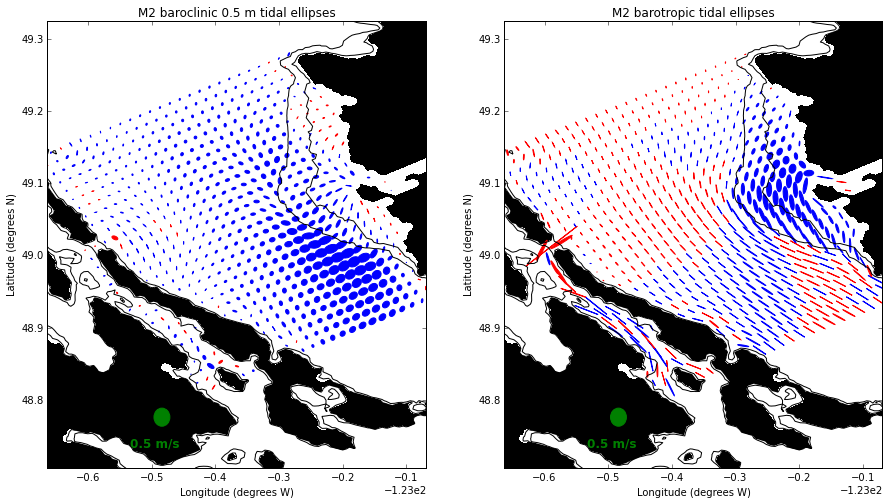

In [5]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
const='M2'
plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, baroclinic=True, depth_level=0, scale=0.05)
plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, scale=0.05)

Over the banks, the baroclinic ellipses are a lot smaller than the barotropic. Is that mostly because of the depth averaging? If the currents are primarily baroptropic here, then ubc= u -udepav will be very small. But how can they be barotropic when this is where the river feeds into the domain? Is the large increase in the baroclinic major/minor axis over the slopes an artifact of this depth averaging?

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


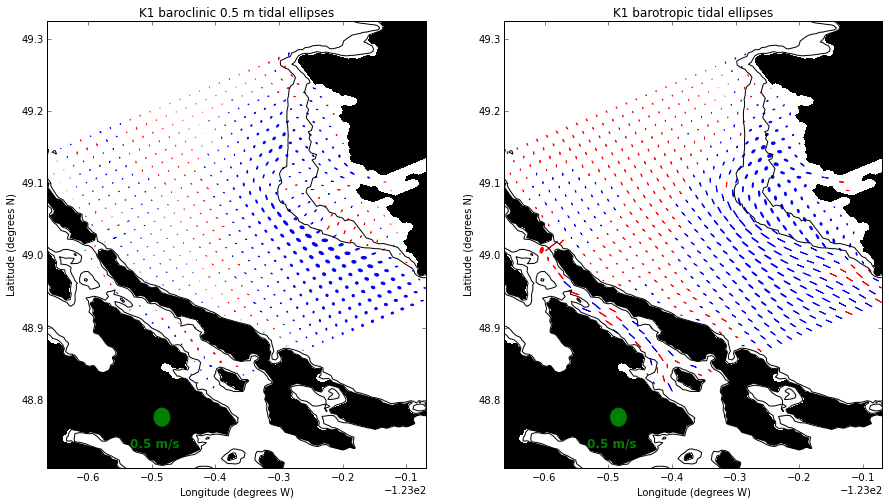

In [6]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
const='K1'
plot_CODAR_ellipse(axs[0],lons, lats, const, bc_struc, baroclinic=True, depth_level=0, scale=0.05)
plot_CODAR_ellipse(axs[1],lons, lats, const, bt_struc, scale=0.05)

##Phase
An attempt at comparing the baroclinic and barotropic phase

In [7]:
def plot_phase(ax, lons, lats, const, datastruc, baroclinic=False, depth_level = 0):
    """Plot the phase stored in a matalb datastruc"""
    major, minor, pha, inc = bc.get_constituent(const, datastruc)
    if baroclinic:
        pha = pha[:,:,depth_level]
        title_str = 'baroclinic {0:.3g} m'.format(depths[depth_level][0])
    else:
        title_str = 'barotropic'
        
    mesh=ax.pcolormesh(lons, lats, pha, vmin=0, vmax=360, cmap = 'hsv')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('Phase (deg wrt GMT)')
    
    ax.set_xlim([lons[0,0]-0.23, lons[-1,-1]+0.2])
    ax.set_ylim([lats[0,0]-0.1, lats[-1,-1]+0.04])
    ax.set_ylabel('Latitude (degrees N)')
    ax.set_xlabel('Longitude (degrees W)')
    
    viz_tools.plot_land_mask(ax, grid, coords='map')
    viz_tools.plot_coastline(ax, grid, coords='map', isobath=5)
    viz_tools.plot_coastline(ax, grid, coords='map', isobath=20)
    viz_tools.set_aspect(ax)
    
    ax.set_title('{} {} phase'.format(const, title_str))

/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
/home/nsoontie/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


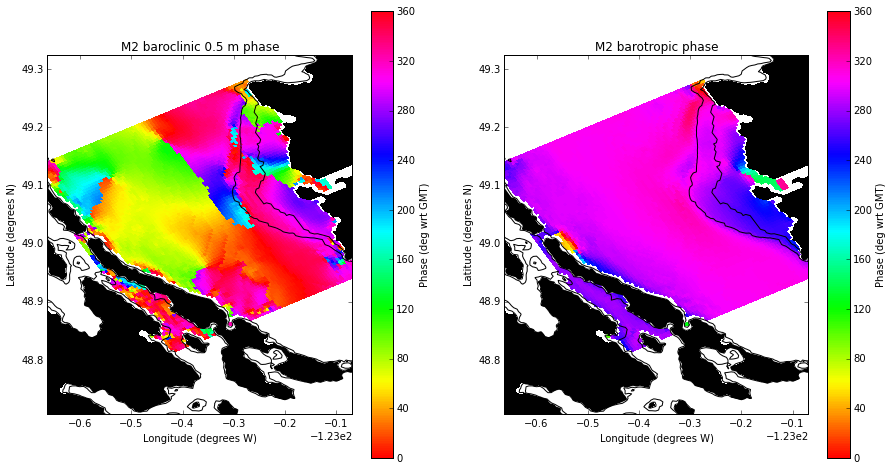

In [8]:
fig,axs = plt.subplots(1,2,figsize=(15,8))
const='M2'
plot_phase(axs[0],lons, lats, const, bc_struc, baroclinic=True, depth_level=0)
plot_phase(axs[1],lons, lats, const, bt_struc)

The large baroclinic phase discontinuity (green area) is about 180 and results from a 180 deg shift in the incliation.  Over the banks, the baroclinic phase is delayed  when compared to the baroptropic phase. But, the barotopic and baroclinic currents are also in very different directions.

Idea - rotate baroclinic ellipse onto the barotropic major/minor axis. Look at the phase aligned with the barotropic major axis.